In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
print(tf.__version__)

2.7.0


In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 652s 4us/step


In [5]:
X_train.shape()

TypeError: 'tuple' object is not callable

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10, 1))
    plt.imshow(X_train[index])

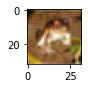

In [9]:
plot_sample(0)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
classes[y_train[3][0]]

'deer'

In [12]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [13]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [17]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype='float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 31s 17ms/step - loss: 1.8115 - accuracy: 0.3526
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6209 - accuracy: 0.4273
Epoch 3/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5390 - accuracy: 0.4575
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4786 - accuracy: 0.4802
Epoch 5/50
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4262 - accuracy: 0.4973
Epoch 6/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3840 - accuracy: 0.5147
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3445 - accuracy: 0.5281
Epoch 8/50
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3089 - accuracy: 0.5419
Epoch 9/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2744 - accuracy: 0.5542
Epoch 10/50
1563/1563 [==============================] - 28s 18m

In [20]:
model.predict(X_test_scaled)

array([[5.25876224e-01, 2.02370718e-01, 7.05042362e-01, ...,
        5.31388912e-04, 8.30048740e-01, 1.22596793e-01],
       [8.92070293e-01, 9.81696129e-01, 4.36019152e-01, ...,
        9.85107496e-02, 9.99890566e-01, 9.97337043e-01],
       [9.88602102e-01, 9.69123483e-01, 2.73973376e-01, ...,
        9.23012912e-01, 9.98276114e-01, 9.03863609e-01],
       ...,
       [1.96567342e-01, 1.07439992e-03, 9.83206093e-01, ...,
        7.22026289e-01, 2.71290064e-01, 5.36269322e-02],
       [8.56343508e-02, 9.44624282e-03, 9.17811096e-01, ...,
        7.10311681e-02, 1.44636273e-01, 1.06867664e-01],
       [2.30058745e-01, 2.26888712e-02, 9.09354687e-01, ...,
        9.98520315e-01, 1.19009115e-01, 3.74016106e-01]], dtype=float32)

In [21]:
y_test[0]

array([3], dtype=uint8)

In [25]:
classes[y_test[1][0]]

'ship'

In [24]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

'ship'

In [26]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation="relu"),
        keras.layers.Dense(3000, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid"),
    ])
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 99s 62ms/step - loss: 1.8082 - accuracy: 0.3570
